C:\Users\Richard Zha\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


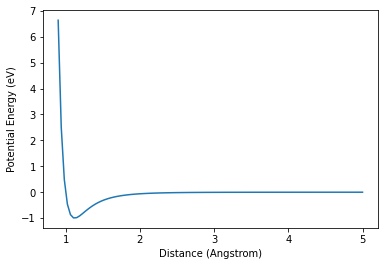

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import maxwell

# plot the ljp and force equations for testing
def ljp(r, epsilon, sigma):
    
    return  4 * epsilon * (np.power((sigma/r), 12) - np.power((sigma/r), 6))

def force(r, epsilon, sigma):
    r_sq = r * r
    inv_r_sq = 1/(r_sq)
    pinv_r_sq = sigma/(r_sq)
    term2 = pinv_r_sq * pinv_r_sq * pinv_r_sq
    term1 = term2 * term2
    forcex = delta_x * (24 * epsilon * ((2*term1) - term2) * inv_r_sq)  # noqa
    forcey = delta_y * (24 * epsilon * ((2*term1) - term2) * inv_r_sq)  # noqa

    return np.power((forcex * forcex + forcey * forcey), 0.5)

epsilon = 1
sigma = 1
r = np.linspace(.9, 5, 100)
plt.plot(r, ljp(r, epsilon, sigma))
plt.xlabel('Distance (Angstrom)')
plt.ylabel('Potential Energy (eV)')
plt.show()


In [2]:
# test plotting the boltzmann distribution
T = 0.5
N = 1000

Text(0, 0.5, 'Frequency')

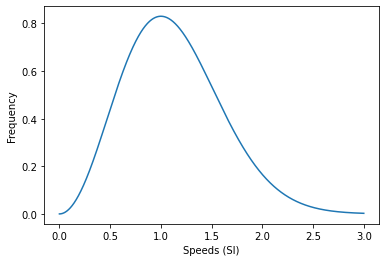

In [8]:
def maxwell(c, T):
    coef1 = 4 * np.pi * np.power(1 / (2 * np.pi * 1 * T), 1.5)
    exp = np.power(np.e, (-1 * 0.5 * 1 * c * c)/(1 * T))
    return coef1 * c * c * exp

speeds = np.arange(0, 3, .001)
y = [maxwell(c, T) for c in speeds]
plt.plot(speeds, y)
plt.xlabel("Speeds (SI)")
plt.ylabel("Frequency")

In [4]:
from engine import Engine
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import maxwell
import time


In [5]:
e = Engine()
e.load_settings("./settings.yaml")
#e.load_positions("./data.xyz")

[[0.625 0.625]
 [0.625 1.875]
 [0.625 3.125]
 [0.625 4.375]
 [0.625 5.625]
 [1.875 0.625]
 [1.875 1.875]
 [1.875 3.125]
 [1.875 4.375]
 [1.875 5.625]
 [3.125 0.625]
 [3.125 1.875]
 [3.125 3.125]
 [3.125 4.375]
 [3.125 5.625]
 [4.375 0.625]
 [4.375 1.875]
 [4.375 3.125]
 [4.375 4.375]
 [4.375 5.625]]


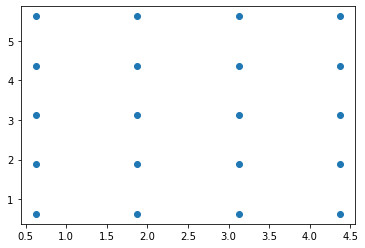

In [6]:
initpos = e.pos.copy()
ax1 = plt.scatter(initpos[:, 0], initpos[:, 1])
print(initpos)

time: 0.0200
iterations: 1
E: 0.0
avgT: 0.0
instantT: 0.0

time: 0.0400
iterations: 2
E: 1.7982741471812583e+50
avgT: 0.0
instantT: 8.991370735906292e+48

time: 0.0600
iterations: 3
E: nan
avgT: 0.0
instantT: nan

time: 0.0800
iterations: 4
E: nan
avgT: 0.0
instantT: nan

time: 0.1000
iterations: 5
E: nan
avgT: 0.0
instantT: nan

time: 0.1200
iterations: 6
E: nan
avgT: nan
instantT: nan

time: 0.1400
iterations: 7
E: nan
avgT: nan
instantT: nan

time: 0.1600
iterations: 8
E: nan
avgT: nan
instantT: nan

time: 0.1800
iterations: 9
E: nan
avgT: nan
instantT: nan

time: 0.2000
iterations: 10
E: nan
avgT: nan
instantT: nan

time: 0.2200
iterations: 11
E: nan
avgT: nan
instantT: nan

time: 0.2400
iterations: 12
E: nan
avgT: nan
instantT: nan

time: 0.2600
iterations: 13
E: nan
avgT: nan
instantT: nan

time: 0.2800
iterations: 14
E: nan
avgT: nan
instantT: nan

time: 0.3000
iterations: 15
E: nan
avgT: nan
instantT: nan

time: 0.3200
iterations: 16
E: nan
avgT: nan
instantT: nan

time: 0.3400

D:\Projects\sketchmm\engine.py:237: RuntimeWarning: divide by zero encountered in double_scalars
  if dist_sq < (cutoff * cutoff):
D:\Projects\sketchmm\engine.py:238: RuntimeWarning: divide by zero encountered in double_scalars
  inv_dist_sq = 1.0 / dist_sq
D:\Projects\sketchmm\engine.py:242: RuntimeWarning: invalid value encountered in double_scalars
  self.pE += 4.0 * eps * \
D:\Projects\sketchmm\engine.py:246: RuntimeWarning: invalid value encountered in double_scalars
  forcex = delta_x * 24.0 * eps * \
D:\Projects\sketchmm\engine.py:248: RuntimeWarning: invalid value encountered in double_scalars
  forcey = delta_y * 24.0 * eps * \
D:\Projects\sketchmm\engine.py:183: RuntimeWarning: invalid value encountered in remainder
  # wrap coordinates around boundaries


time: 3.7800
iterations: 189
E: nan
avgT: nan
instantT: nan

time: 3.8000
iterations: 190
E: nan
avgT: nan
instantT: nan

time: 3.8200
iterations: 191
E: nan
avgT: nan
instantT: nan

time: 3.8400
iterations: 192
E: nan
avgT: nan
instantT: nan

time: 3.8600
iterations: 193
E: nan
avgT: nan
instantT: nan

time: 3.8800
iterations: 194
E: nan
avgT: nan
instantT: nan

time: 3.9000
iterations: 195
E: nan
avgT: nan
instantT: nan

time: 3.9200
iterations: 196
E: nan
avgT: nan
instantT: nan

time: 3.9400
iterations: 197
E: nan
avgT: nan
instantT: nan

time: 3.9600
iterations: 198
E: nan
avgT: nan
instantT: nan

time: 3.9800
iterations: 199
E: nan
avgT: nan
instantT: nan

time: 4.0000
iterations: 200
E: nan
avgT: nan
instantT: nan

time: 4.0200
iterations: 201
E: nan
avgT: nan
instantT: nan

time: 4.0400
iterations: 202
E: nan
avgT: nan
instantT: nan

time: 4.0600
iterations: 203
E: nan
avgT: nan
instantT: nan

time: 4.0800
iterations: 204
E: nan
avgT: nan
instantT: nan

time: 4.1000
iterations:

instantT: nan

time: 8.3800
iterations: 419
E: nan
avgT: nan
instantT: nan

time: 8.4000
iterations: 420
E: nan
avgT: nan
instantT: nan

time: 8.4200
iterations: 421
E: nan
avgT: nan
instantT: nan

time: 8.4400
iterations: 422
E: nan
avgT: nan
instantT: nan

time: 8.4600
iterations: 423
E: nan
avgT: nan
instantT: nan

time: 8.4800
iterations: 424
E: nan
avgT: nan
instantT: nan

time: 8.5000
iterations: 425
E: nan
avgT: nan
instantT: nan

time: 8.5200
iterations: 426
E: nan
avgT: nan
instantT: nan

time: 8.5400
iterations: 427
E: nan
avgT: nan
instantT: nan

time: 8.5600
iterations: 428
E: nan
avgT: nan
instantT: nan

time: 8.5800
iterations: 429
E: nan
avgT: nan
instantT: nan

time: 8.6000
iterations: 430
E: nan
avgT: nan
instantT: nan

time: 8.6200
iterations: 431
E: nan
avgT: nan
instantT: nan

time: 8.6400
iterations: 432
E: nan
avgT: nan
instantT: nan

time: 8.6600
iterations: 433
E: nan
avgT: nan
instantT: nan

time: 8.6800
iterations: 434
E: nan
avgT: nan
instantT: nan

time: 8.7

instantT: nan

time: 11.9200
iterations: 596
E: nan
avgT: nan
instantT: nan

time: 11.9400
iterations: 597
E: nan
avgT: nan
instantT: nan

time: 11.9600
iterations: 598
E: nan
avgT: nan
instantT: nan

time: 11.9800
iterations: 599
E: nan
avgT: nan
instantT: nan

time: 12.0000
iterations: 600
E: nan
avgT: nan
instantT: nan

time: 12.0200
iterations: 601
E: nan
avgT: nan
instantT: nan

time: 12.0400
iterations: 602
E: nan
avgT: nan
instantT: nan

time: 12.0600
iterations: 603
E: nan
avgT: nan
instantT: nan

time: 12.0800
iterations: 604
E: nan
avgT: nan
instantT: nan

time: 12.1000
iterations: 605
E: nan
avgT: nan
instantT: nan

time: 12.1200
iterations: 606
E: nan
avgT: nan
instantT: nan

time: 12.1400
iterations: 607
E: nan
avgT: nan
instantT: nan

time: 12.1600
iterations: 608
E: nan
avgT: nan
instantT: nan

time: 12.1800
iterations: 609
E: nan
avgT: nan
instantT: nan

time: 12.2000
iterations: 610
E: nan
avgT: nan
instantT: nan

time: 12.2200
iterations: 611
E: nan
avgT: nan
instantT

time: 16.6000
iterations: 830
E: nan
avgT: nan
instantT: nan

time: 16.6200
iterations: 831
E: nan
avgT: nan
instantT: nan

time: 16.6400
iterations: 832
E: nan
avgT: nan
instantT: nan

time: 16.6600
iterations: 833
E: nan
avgT: nan
instantT: nan

time: 16.6800
iterations: 834
E: nan
avgT: nan
instantT: nan

time: 16.7000
iterations: 835
E: nan
avgT: nan
instantT: nan

time: 16.7200
iterations: 836
E: nan
avgT: nan
instantT: nan

time: 16.7400
iterations: 837
E: nan
avgT: nan
instantT: nan

time: 16.7600
iterations: 838
E: nan
avgT: nan
instantT: nan

time: 16.7800
iterations: 839
E: nan
avgT: nan
instantT: nan

time: 16.8000
iterations: 840
E: nan
avgT: nan
instantT: nan

time: 16.8200
iterations: 841
E: nan
avgT: nan
instantT: nan

time: 16.8400
iterations: 842
E: nan
avgT: nan
instantT: nan

time: 16.8600
iterations: 843
E: nan
avgT: nan
instantT: nan

time: 16.8800
iterations: 844
E: nan
avgT: nan
instantT: nan

time: 16.9000
iterations: 845
E: nan
avgT: nan
instantT: nan

time: 16

time: 21.1600
iterations: 1058
E: nan
avgT: nan
instantT: nan

time: 21.1800
iterations: 1059
E: nan
avgT: nan
instantT: nan

time: 21.2000
iterations: 1060
E: nan
avgT: nan
instantT: nan

time: 21.2200
iterations: 1061
E: nan
avgT: nan
instantT: nan

time: 21.2400
iterations: 1062
E: nan
avgT: nan
instantT: nan

time: 21.2600
iterations: 1063
E: nan
avgT: nan
instantT: nan

time: 21.2800
iterations: 1064
E: nan
avgT: nan
instantT: nan

time: 21.3000
iterations: 1065
E: nan
avgT: nan
instantT: nan

time: 21.3200
iterations: 1066
E: nan
avgT: nan
instantT: nan

time: 21.3400
iterations: 1067
E: nan
avgT: nan
instantT: nan

time: 21.3600
iterations: 1068
E: nan
avgT: nan
instantT: nan

time: 21.3800
iterations: 1069
E: nan
avgT: nan
instantT: nan

time: 21.4000
iterations: 1070
E: nan
avgT: nan
instantT: nan

time: 21.4200
iterations: 1071
E: nan
avgT: nan
instantT: nan

time: 21.4400
iterations: 1072
E: nan
avgT: nan
instantT: nan

time: 21.4600
iterations: 1073
E: nan
avgT: nan
instant


time: 25.4000
iterations: 1270
E: nan
avgT: nan
instantT: nan

time: 25.4200
iterations: 1271
E: nan
avgT: nan
instantT: nan

time: 25.4400
iterations: 1272
E: nan
avgT: nan
instantT: nan

time: 25.4600
iterations: 1273
E: nan
avgT: nan
instantT: nan

time: 25.4800
iterations: 1274
E: nan
avgT: nan
instantT: nan

time: 25.5000
iterations: 1275
E: nan
avgT: nan
instantT: nan

time: 25.5200
iterations: 1276
E: nan
avgT: nan
instantT: nan

time: 25.5400
iterations: 1277
E: nan
avgT: nan
instantT: nan

time: 25.5600
iterations: 1278
E: nan
avgT: nan
instantT: nan

time: 25.5800
iterations: 1279
E: nan
avgT: nan
instantT: nan

time: 25.6000
iterations: 1280
E: nan
avgT: nan
instantT: nan

time: 25.6200
iterations: 1281
E: nan
avgT: nan
instantT: nan

time: 25.6400
iterations: 1282
E: nan
avgT: nan
instantT: nan

time: 25.6600
iterations: 1283
E: nan
avgT: nan
instantT: nan

time: 25.6800
iterations: 1284
E: nan
avgT: nan
instantT: nan

time: 25.7000
iterations: 1285
E: nan
avgT: nan
instan

time: 29.5800
iterations: 1479
E: nan
avgT: nan
instantT: nan

time: 29.6000
iterations: 1480
E: nan
avgT: nan
instantT: nan

time: 29.6200
iterations: 1481
E: nan
avgT: nan
instantT: nan

time: 29.6400
iterations: 1482
E: nan
avgT: nan
instantT: nan

time: 29.6600
iterations: 1483
E: nan
avgT: nan
instantT: nan

time: 29.6800
iterations: 1484
E: nan
avgT: nan
instantT: nan

time: 29.7000
iterations: 1485
E: nan
avgT: nan
instantT: nan

time: 29.7200
iterations: 1486
E: nan
avgT: nan
instantT: nan

time: 29.7400
iterations: 1487
E: nan
avgT: nan
instantT: nan

time: 29.7600
iterations: 1488
E: nan
avgT: nan
instantT: nan

time: 29.7800
iterations: 1489
E: nan
avgT: nan
instantT: nan

time: 29.8000
iterations: 1490
E: nan
avgT: nan
instantT: nan

time: 29.8200
iterations: 1491
E: nan
avgT: nan
instantT: nan

time: 29.8400
iterations: 1492
E: nan
avgT: nan
instantT: nan

time: 29.8600
iterations: 1493
E: nan
avgT: nan
instantT: nan

time: 29.8800
iterations: 1494
E: nan
avgT: nan
instant

iterations: 1688
E: nan
avgT: nan
instantT: nan

time: 33.7800
iterations: 1689
E: nan
avgT: nan
instantT: nan

time: 33.8000
iterations: 1690
E: nan
avgT: nan
instantT: nan

time: 33.8200
iterations: 1691
E: nan
avgT: nan
instantT: nan

time: 33.8400
iterations: 1692
E: nan
avgT: nan
instantT: nan

time: 33.8600
iterations: 1693
E: nan
avgT: nan
instantT: nan

time: 33.8800
iterations: 1694
E: nan
avgT: nan
instantT: nan

time: 33.9000
iterations: 1695
E: nan
avgT: nan
instantT: nan

time: 33.9200
iterations: 1696
E: nan
avgT: nan
instantT: nan

time: 33.9400
iterations: 1697
E: nan
avgT: nan
instantT: nan

time: 33.9600
iterations: 1698
E: nan
avgT: nan
instantT: nan

time: 33.9800
iterations: 1699
E: nan
avgT: nan
instantT: nan

time: 34.0000
iterations: 1700
E: nan
avgT: nan
instantT: nan

time: 34.0200
iterations: 1701
E: nan
avgT: nan
instantT: nan

time: 34.0400
iterations: 1702
E: nan
avgT: nan
instantT: nan

time: 34.0600
iterations: 1703
E: nan
avgT: nan
instantT: nan

time: 

iterations: 1888
E: nan
avgT: nan
instantT: nan

time: 37.7800
iterations: 1889
E: nan
avgT: nan
instantT: nan

time: 37.8000
iterations: 1890
E: nan
avgT: nan
instantT: nan

time: 37.8200
iterations: 1891
E: nan
avgT: nan
instantT: nan

time: 37.8400
iterations: 1892
E: nan
avgT: nan
instantT: nan

time: 37.8600
iterations: 1893
E: nan
avgT: nan
instantT: nan

time: 37.8800
iterations: 1894
E: nan
avgT: nan
instantT: nan

time: 37.9000
iterations: 1895
E: nan
avgT: nan
instantT: nan

time: 37.9200
iterations: 1896
E: nan
avgT: nan
instantT: nan

time: 37.9400
iterations: 1897
E: nan
avgT: nan
instantT: nan

time: 37.9600
iterations: 1898
E: nan
avgT: nan
instantT: nan

time: 37.9800
iterations: 1899
E: nan
avgT: nan
instantT: nan

time: 38.0000
iterations: 1900
E: nan
avgT: nan
instantT: nan

time: 38.0200
iterations: 1901
E: nan
avgT: nan
instantT: nan

time: 38.0400
iterations: 1902
E: nan
avgT: nan
instantT: nan

time: 38.0600
iterations: 1903
E: nan
avgT: nan
instantT: nan

time: 

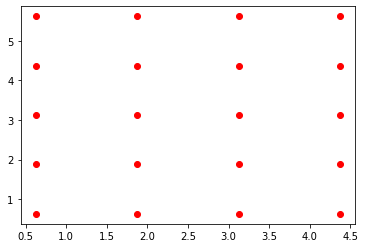

In [7]:
start_time = time.time()
for i_ in range(2000):
    e.step_forward()
    
endpos = e.pos.copy()
print(endpos)
end_time = time.time()
persec = e.iterations / (end_time - start_time)
print(f"{end_time-start_time} seconds elapsed")
print(f"{persec} time steps per second")
ax = plt.scatter(initpos[:, 0], initpos[:, 1], color="red")
ax1 = plt.scatter(endpos[:, 0], endpos[:, 1], color="black")

In [20]:
e.fixed_steps_simulation(1000)

time: 4.3200
iterations: 216
E: 0.027830642818662432
avgT: 0.6085689367490159
instantT: 0.33007636236711535

time: 4.3400
iterations: 217
E: 0.02783620165354972
avgT: 0.6085689367490159
instantT: 0.33796873598243077

time: 4.3600
iterations: 218
E: 0.02784097073381464
avgT: 0.6085689367490159
instantT: 0.34721318884110997

time: 4.3800
iterations: 219
E: 0.027843589868067342
avgT: 0.6085689367490159
instantT: 0.35786928699946474

time: 4.4000
iterations: 220
E: 0.027841888394312564
avgT: 0.6085689367490159
instantT: 0.36998346594679754

time: 4.4200
iterations: 221
E: 0.027832477242025422
avgT: 0.603455385398071
instantT: 0.3835726773074414

time: 4.4400
iterations: 222
E: 0.027810198290632027
avgT: 0.603455385398071
instantT: 0.3985989528748076

time: 4.4600
iterations: 223
E: 0.027767464717784462
avgT: 0.603455385398071
instantT: 0.4149309463411055

time: 4.4800
iterations: 224
E: 0.02769368033367836
avgT: 0.603455385398071
instantT: 0.43228795712076473

time: 4.5000
iterations: 225


iterations: 459
E: -0.09967924813668494
avgT: 0.46979637644458466
instantT: 0.4417822048285897

time: 9.2000
iterations: 460
E: -0.09991996015702898
avgT: 0.46979637644458466
instantT: 0.43871038355282765

time: 9.2200
iterations: 461
E: -0.0996800673851006
avgT: 0.46931507457844523
instantT: 0.4255166047597559

time: 9.2400
iterations: 462
E: -0.09874194504318434
avgT: 0.46931507457844523
instantT: 0.40480889437455053

time: 9.2600
iterations: 463
E: -0.09737730344276085
avgT: 0.46931507457844523
instantT: 0.38384846649593884

time: 9.2800
iterations: 464
E: -0.0964725679592967
avgT: 0.46931507457844523
instantT: 0.3722403074771691

time: 9.3000
iterations: 465
E: -0.09678211514133395
avgT: 0.46931507457844523
instantT: 0.3760700386357991

time: 9.3200
iterations: 466
E: -0.09803599673477192
avgT: 0.46849743657678883
instantT: 0.3932747404244002

time: 9.3400
iterations: 467
E: -0.09927603239573679
avgT: 0.46849743657678883
instantT: 0.4152758893066302

time: 9.3600
iterations: 468
E:

instantT: 0.36931871748030687

time: 12.6600
iterations: 633
E: 0.15317828649875154
avgT: 0.44760583416410576
instantT: 0.3591130678491875

time: 12.6800
iterations: 634
E: 0.1531697567029151
avgT: 0.44760583416410576
instantT: 0.3501007032093334

time: 12.7000
iterations: 635
E: 0.15316182080230722
avgT: 0.44760583416410576
instantT: 0.3421892190325492

time: 12.7200
iterations: 636
E: 0.1531546824951907
avgT: 0.4467214899257136
instantT: 0.33529411588829416

time: 12.7400
iterations: 637
E: 0.15314842363134296
avgT: 0.4467214899257136
instantT: 0.32934007064496484

time: 12.7600
iterations: 638
E: 0.15314305724499355
avgT: 0.4467214899257136
instantT: 0.32426132088932524

time: 12.7800
iterations: 639
E: 0.1531385602685288
avgT: 0.4467214899257136
instantT: 0.32000156072128666

time: 12.8000
iterations: 640
E: 0.15313489351727905
avgT: 0.4467214899257136
instantT: 0.31651359321891626

time: 12.8200
iterations: 641
E: 0.15313201375333518
avgT: 0.4456827196057115
instantT: 0.3137588889

time: 16.2400
iterations: 812
E: 0.5279937616398965
avgT: 0.45038590011367663
instantT: 0.4274683312533722

time: 16.2600
iterations: 813
E: 0.527993907196491
avgT: 0.45038590011367663
instantT: 0.4292685147609934

time: 16.2800
iterations: 814
E: 0.5279940851050231
avgT: 0.45038590011367663
instantT: 0.431205410980036

time: 16.3000
iterations: 815
E: 0.527994300764789
avgT: 0.45038590011367663
instantT: 0.43328748385226135

time: 16.3200
iterations: 816
E: 0.5279945603277831
avgT: 0.4502947231637631
instantT: 0.4355240572777724

time: 16.3400
iterations: 817
E: 0.5279948707923071
avgT: 0.4502947231637631
instantT: 0.43792540428542737

time: 16.3600
iterations: 818
E: 0.5279952401030246
avgT: 0.4502947231637631
instantT: 0.4405028472127185

time: 16.3800
iterations: 819
E: 0.5279956772550032
avgT: 0.4502947231637631
instantT: 0.44326887016205674

time: 16.4000
iterations: 820
E: 0.5279961923973597
avgT: 0.4502947231637631
instantT: 0.4462372450907705

time: 16.4200
iterations: 821
E: 

E: 0.8113429544771557
avgT: 0.46051325151900063
instantT: 0.5766686805278087

time: 20.0200
iterations: 1001
E: 0.9122866848084388
avgT: 0.4614059816468672
instantT: 0.6390592770923199

time: 20.0400
iterations: 1002
E: 0.9122917119574925
avgT: 0.4614059816468672
instantT: 0.6524339073461364

time: 20.0600
iterations: 1003
E: 0.9122965009949349
avgT: 0.4614059816468672
instantT: 0.6668364338949834

time: 20.0800
iterations: 1004
E: 0.9123005356076559
avgT: 0.4614059816468672
instantT: 0.6823585231094156

time: 20.1000
iterations: 1005
E: 0.9123029551233646
avgT: 0.4614059816468672
instantT: 0.6990944480257577

time: 20.1200
iterations: 1006
E: 0.9123023642300214
avgT: 0.46267826908105003
instantT: 0.7171357559176089

time: 20.1400
iterations: 1007
E: 0.9122965492436743
avgT: 0.46267826908105003
instantT: 0.7365620285070094

time: 20.1600
iterations: 1008
E: 0.91228206749212
avgT: 0.46267826908105003
instantT: 0.7574255805192379

time: 20.1800
iterations: 1009
E: 0.9122536834107654
avgT

instantT: 0.746780436934916

time: 24.2400
iterations: 1212
E: 1.0667524583066852
avgT: 0.4923313585399145
instantT: 0.7865712061490933

time: 24.2600
iterations: 1213
E: 1.0667530377309742
avgT: 0.4923313585399145
instantT: 0.8338949744882908

time: 24.2800
iterations: 1214
E: 1.0663403286555617
avgT: 0.4923313585399145
instantT: 0.8886710084198052

time: 24.3000
iterations: 1215
E: 1.0648024934732887
avgT: 0.4923313585399145
instantT: 0.9478449807183241

0.9406089782714844 seconds elapsed
1291.7163540504916 time steps per second
